# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [2]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000, n_features=5, n_informative=2, shuffle=False,
    coef=True, random_state=0, noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

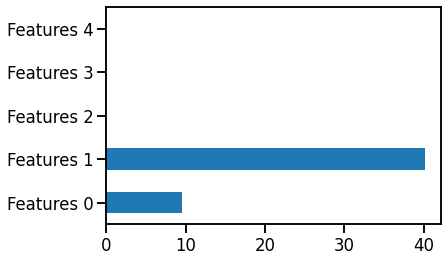

In [3]:
import pandas as pd

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

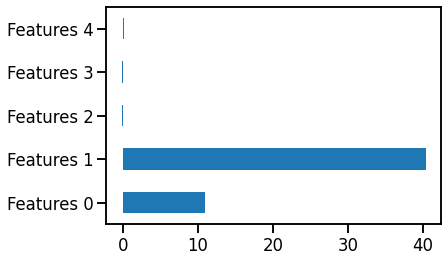

In [5]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficients are close to the coefficients used to generate
the dataset. The dispersion is indeed cause by the noise injected during the
dataset generation.

Now, create a new dataset that will be the same as `data` with 4 additional
columns that will repeat twice features 0 and 1. This procedure will create
perfectly correlated features.

In [49]:
# Write your code here.
import numpy as np

type(data)
data.shape
# data[:,0].s1hape
data = np.concatenate((data, data[:,[0, 1]], data[:,[0, 1]]), axis=1) 
print(data.shape)
data

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.40015721,
         1.76405235,  0.40015721],
       [-0.97727788,  0.95008842, -0.15135721, ...,  0.95008842,
        -0.97727788,  0.95008842],
       [ 0.14404357,  1.45427351,  0.76103773, ...,  1.45427351,
         0.14404357,  1.45427351],
       ...,
       [-0.77440295,  0.70878733,  0.0184736 , ...,  0.70878733,
        -0.77440295,  0.70878733],
       [-0.25090635, -0.96275025,  0.49340515, ..., -0.96275025,
        -0.25090635, -0.96275025],
       [-1.80928169,  0.04235881,  0.51687218, ...,  0.04235881,
        -1.80928169,  0.04235881]])

Fit again the linear regressor on this new dataset and check the
coefficients. What do you observe?

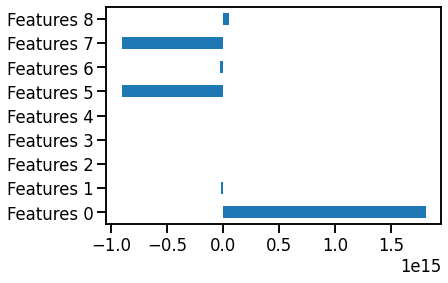

In [50]:
# Write your code here.

linear_regression.fit(data, target)
linear_regression.coef_

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()



Create a ridge regressor and fit on the same dataset. Check the coefficients.
What do you observe?

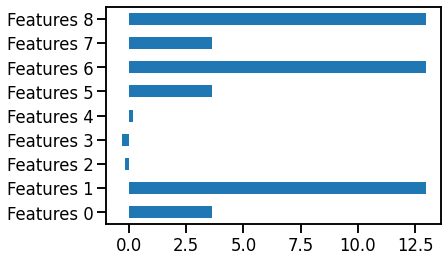

In [55]:
# Write your code here.

import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, store_cv_values=True)
)

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)
weights_ridge

coef = pd.Series(weights_ridge.mean(), index=feature_names)
_ = coef.plot.barh()

Can you find the relationship between the ridge coefficients and the original
coefficients?

In [61]:
# Write your code here.

ridge_coeff = weights_ridge.mean()
ridge_coeff[:5]*3

Features 0    10.839027
Features 1    38.894588
Features 2    -0.459743
Features 3    -0.926604
Features 4     0.589360
dtype: float64